<strong><b><font size="6">NLP_preprocessing_Lab1</font></b></strong>

<h1>To do tasks <span class="tocSkip"></span></h1>
    <li> Lower casing
    <li> Punctuation removal
    <li> Identifying and Remove Stop Words
    <li> Tokenize Text in Words
    <li> NLTK Word Stemming
    <li> Build a bag-of-words
    <li> Create Term Frequency-Inverse Document Frequency (TF-IDF)
    <li> Bag of words
  

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import string
import re

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize

#sci-kit learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## Download and Inspect the IMDB Movie Reviews Dataset
- Labeled movie reviews data as either positive or negative reviews
- We can download the __movie_reviews__ package using the nltk.download function:

In [2]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [3]:
from nltk.corpus import movie_reviews

In [4]:
len(movie_reviews.fileids())

2000

In [5]:
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [6]:
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

- __fileids__ can also filter the available files based on their category, which is the name of the subfolders they are located in. Therefore we can have lists of positive and negative reviews separately.

In [7]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [8]:
negative_fileids

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [9]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

- We can inspect one of the reviews using the raw method of movie_reviews, each file is split into sentences, the curators of this dataset also removed from each review from any direct mention of the rating of the movie.

In [10]:
print(movie_reviews.raw(fileids=positive_fileids[2]))

you've got mail works alot better than it deserves to . 
in order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . 
no real acting was involved and there is not an original or inventive bone in it's body ( it's basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) . 
essentially , it goes against and defies all concepts of good contemporary filmmaking . 
it's overly sentimental and at times terribly mushy , not to mention very manipulative . 
but oh , how enjoyable that manipulation is . 
but there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan/hanks teaming , sleepless in seattle . 
it couldn't have been the directing , because both films were helmed by the same woman . 
i haven't quite yet figured out what i like

In [11]:
negative_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'neg'} for f in negative_fileids
)

In [12]:
positive_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'pos'} for f in positive_fileids
)

In [13]:
data = pd.concat([positive_features, negative_features], ignore_index=True)


In [14]:
data

,review,label
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you've got mail works alot better than it dese...,pos
3,""" jaws "" is a rare film that grabs your atten...",pos
4,moviemaking is a lot like being the general ma...,pos
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",neg
1996,"john boorman's "" zardoz "" is a goofy cinematic...",neg
1997,the kids in the hall are an acquired taste . \...,neg
1998,there was a time when john carpenter was a gre...,neg


### Lower casing

In [15]:
data["review"]= data["review"].str.lower()

In [16]:
data["review"].apply(lambda x:x.islower()).all()

True

### Contractions

In [17]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not","'ve": " have"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews
data['review']=data['review'].apply(lambda x:expand_contractions(x))

### Remove punctuation

In [18]:
data.review[2]

"you have got mail works alot better than it deserves to . \nin order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . \nno real acting was involved and there is not an original or inventive bone in it is body ( it is basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) . \nessentially , it goes against and defies all concepts of good contemporary filmmaking . \nit is overly sentimental and at times terribly mushy , not to mention very manipulative . \nbut oh , how enjoyable that manipulation is . \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan/hanks teaming , sleepless in seattle . \nit couldn't have been the directing , because both films were helmed by the same woman . \ni haven't quite yet figured o

In [19]:
punctuations = list(string.punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [20]:
data["review"]= data["review"].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [21]:
#verification
print(data.review[2])

you have got mail works alot better than it deserves to  
in order to make the film a success  all they had to do was cast two extremely popular and attractive stars  have them share the screen for about two hours and then collect the profits  
no real acting was involved and there is not an original or inventive bone in it is body  it is basically a complete reshoot of the shop around the corner  only adding a few modern twists   
essentially  it goes against and defies all concepts of good contemporary filmmaking  
it is overly sentimental and at times terribly mushy  not to mention very manipulative  
but oh  how enjoyable that manipulation is  
but there must be something other than the casting and manipulation that makes the movie work as well as it does  because i absolutely hated the previous ryanhanks teaming  sleepless in seattle  
it couldnt have been the directing  because both films were helmed by the same woman  
i havent quite yet figured out what i liked so much about yo

### Removing Degits

In [22]:
#remove words with digits 
data['review'] = data['review'].apply(lambda x: re.sub(r'[0-9]*', '',x))

In [23]:
data['review'].str.isnumeric().any()

False

### Identifying and Remove Stop Words
- A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). 
- Removal of stopwords is necessary since they add noise without having any informational value in modeling.

__Download and check stopwords from nltk:__

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop = set(stopwords.words('english'))

In [26]:
print('Total stop words:',len(stop))

Total stop words: 179


__Removing stopwords from reviews:__

In [27]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])
data['review'] = data['review'].apply(lambda x: remove_stopwords(x))

In [28]:
#verification
print(data.review[2])

got mail works alot better deserves order make film success cast two extremely popular attractive stars share screen two hours collect profits real acting involved original inventive bone body basically complete reshoot shop around corner adding modern twists essentially goes defies concepts good contemporary filmmaking overly sentimental times terribly mushy mention manipulative oh enjoyable manipulation must something casting manipulation makes movie work well absolutely hated previous ryanhanks teaming sleepless seattle couldnt directing films helmed woman havent quite yet figured liked much got mail really important like something much even question storyline cliched come tom hanks plays joe fox insanely likeable owner discount book chain meg ryan plays kathleen kelley even insanely likeable proprietor familyrun children book shop called nice homage shop around corner fox kelley soon become bitter rivals new fox books store opening right across block small business little know alre

### Tokenize Text in Words
- Tokenizing text is important since text can’t be processed without tokenization. Tokenization process means splitting bigger parts to small parts.
- You can tokenize paragraphs to sentences and tokenize sentences to words according to your needs. 
- NLTK is shipped with sentence tokenizer and word tokenizer.
- Non english text can also be tokenized by specifying the language

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

__Word Tokenizing:__

In [30]:
data['review'] = data['review'].apply(lambda x: nltk.word_tokenize(x))

In [31]:
#verification
print(data.review[2])

['got', 'mail', 'works', 'alot', 'better', 'deserves', 'order', 'make', 'film', 'success', 'cast', 'two', 'extremely', 'popular', 'attractive', 'stars', 'share', 'screen', 'two', 'hours', 'collect', 'profits', 'real', 'acting', 'involved', 'original', 'inventive', 'bone', 'body', 'basically', 'complete', 'reshoot', 'shop', 'around', 'corner', 'adding', 'modern', 'twists', 'essentially', 'goes', 'defies', 'concepts', 'good', 'contemporary', 'filmmaking', 'overly', 'sentimental', 'times', 'terribly', 'mushy', 'mention', 'manipulative', 'oh', 'enjoyable', 'manipulation', 'must', 'something', 'casting', 'manipulation', 'makes', 'movie', 'work', 'well', 'absolutely', 'hated', 'previous', 'ryanhanks', 'teaming', 'sleepless', 'seattle', 'couldnt', 'directing', 'films', 'helmed', 'woman', 'havent', 'quite', 'yet', 'figured', 'liked', 'much', 'got', 'mail', 'really', 'important', 'like', 'something', 'much', 'even', 'question', 'storyline', 'cliched', 'come', 'tom', 'hanks', 'plays', 'joe', 'fo

### NLTK Word Stemming
- Word stemming means removing affixes from words and return the root word. Ex: The stem of the word working => work.
- Search engines use this technique when indexing pages, so many people write different versions for the same word and all of them are stemmed to the root word.
- There are many algorithms for stemming, but the most used algorithm is Porter stemming algorithm.
- NLTK has a class called PorterStemmer which uses Porter stemming algorithm.

In [32]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(list):
    return [stemmer.stem(word) for word in list]
data["review_stem"] = data["review"].apply(lambda x: stem_words(x))

In [33]:
#verification
print(data.review_stem[2])

['got', 'mail', 'work', 'alot', 'better', 'deserv', 'order', 'make', 'film', 'success', 'cast', 'two', 'extrem', 'popular', 'attract', 'star', 'share', 'screen', 'two', 'hour', 'collect', 'profit', 'real', 'act', 'involv', 'origin', 'invent', 'bone', 'bodi', 'basic', 'complet', 'reshoot', 'shop', 'around', 'corner', 'ad', 'modern', 'twist', 'essenti', 'goe', 'defi', 'concept', 'good', 'contemporari', 'filmmak', 'overli', 'sentiment', 'time', 'terribl', 'mushi', 'mention', 'manipul', 'oh', 'enjoy', 'manipul', 'must', 'someth', 'cast', 'manipul', 'make', 'movi', 'work', 'well', 'absolut', 'hate', 'previou', 'ryanhank', 'team', 'sleepless', 'seattl', 'couldnt', 'direct', 'film', 'helm', 'woman', 'havent', 'quit', 'yet', 'figur', 'like', 'much', 'got', 'mail', 'realli', 'import', 'like', 'someth', 'much', 'even', 'question', 'storylin', 'clich', 'come', 'tom', 'hank', 'play', 'joe', 'fox', 'insan', 'likeabl', 'owner', 'discount', 'book', 'chain', 'meg', 'ryan', 'play', 'kathleen', 'kelley'

### Lemmatizing Words Using [WordNet](https://wordnet.princeton.edu/)

__Wordnet:__
- WordNet is a lexical database for the English language.
- It groups English words into sets of synonyms called synsets, provides short definitions and usage examples, and records a number of relations among these synonym sets or their members. 
- WordNet can thus be seen as a combination of dictionary and thesaurus. While it is accessible to human users via a web browser, its primary use is in automatic text analysis and artificial intelligence applications.

__Lemmatization:__
- Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. 
- It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.
- Example: reduce words such as “am”, “are”, and “is” to a common form such as “be”

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
#lemmmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(list):
    return [lemmatizer.lemmatize(word) for word in list]
data["review"] = data["review"].apply(lambda x: " ".join(lemmatize_words(x)))

In [36]:
#verification
print(data.review[2])

got mail work alot better deserves order make film success cast two extremely popular attractive star share screen two hour collect profit real acting involved original inventive bone body basically complete reshoot shop around corner adding modern twist essentially go defies concept good contemporary filmmaking overly sentimental time terribly mushy mention manipulative oh enjoyable manipulation must something casting manipulation make movie work well absolutely hated previous ryanhanks teaming sleepless seattle couldnt directing film helmed woman havent quite yet figured liked much got mail really important like something much even question storyline cliched come tom hank play joe fox insanely likeable owner discount book chain meg ryan play kathleen kelley even insanely likeable proprietor familyrun child book shop called nice homage shop around corner fox kelley soon become bitter rival new fox book store opening right across block small business little know already love internet n

### 7) Remove Extra Spaces

Most of the time text data contain extra spaces or while performing the above preprocessing techniques more than one space is left between the text so we need to control this problem. regular expression library performs well to solve this problem.

In [37]:
data["review"] = data["review"].apply(lambda x: re.sub(' +', ' ', x))

These are the most important text preprocessing techniques that are mostly used while dealing with NLP problems.

In [38]:
data = data.fillna(' ')

In [39]:
data.to_csv('movies_cleaned.csv')

---
### __Bag of Words using CountVectorizer:__


In [40]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
corpus=data["review"]
count_vector = CountVectorizer()


In [41]:
X = count_vector.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
frequency_matrix = pd.DataFrame(X,columns=count_vector.get_feature_names_out())
frequency_matrix

,aa,aaa,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaaahhhs,aahs,aaliyah,aalyah,aameetings,...,zuehlke,zuko,zukovsky,zulu,zundel,zurg,zweibel,zwick,zwigoff,zycie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
print('Creating the new bag of words...')
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 100,
                            ngram_range=(1,2),
                            #binary=True,
                            min_df=0.1)#When building the vocabulary ignore terms that have a document frequency strictly 
                                       #lower than the given threshold. This value is also called cut-off in the literature.   

vectorizer_features = vectorizer.fit_transform(data['review'])

# Numpy arrays are easy to work with, so convert the result to an array
vectorizer_features = vectorizer_features.toarray()
print('Bag of words completed')
new_frequency_matrix = pd.DataFrame(vectorizer_features,columns=vectorizer.get_feature_names_out())
new_frequency_matrix

Creating the new bag of words...
Bag of words completed


,action,actor,actually,almost,also,although,another,around,audience,back,...,time,two,want,way,well,woman,work,world,would,year
0,0,0,1,1,0,0,1,0,0,1,...,2,0,0,0,1,0,0,2,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,1,0,0,0,0,1
2,0,0,1,0,0,0,0,2,0,0,...,2,3,0,0,1,1,2,0,0,2
3,0,1,3,1,0,1,0,0,1,0,...,4,0,1,0,0,0,1,1,1,1
4,0,1,0,1,1,0,0,0,0,2,...,0,2,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,2,1,0,3,0,2,2,...,3,1,1,0,1,0,1,0,3,1
1996,0,0,0,0,0,2,0,2,0,2,...,2,2,0,0,1,0,0,3,2,2
1997,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1998,0,1,0,0,1,0,0,0,0,0,...,4,0,1,0,1,0,3,0,1,0


In [44]:
vocab = vectorizer.get_feature_names_out()
print(vocab)

['action' 'actor' 'actually' 'almost' 'also' 'although' 'another' 'around'
 'audience' 'back' 'bad' 'best' 'better' 'big' 'character' 'come' 'comedy'
 'could' 'day' 'director' 'doesnt' 'dont' 'effect' 'end' 'enough' 'even'
 'every' 'fact' 'film' 'find' 'first' 'friend' 'funny' 'get' 'give' 'go'
 'going' 'good' 'great' 'guy' 'however' 'isnt' 'john' 'know' 'last' 'life'
 'like' 'little' 'look' 'lot' 'love' 'made' 'make' 'man' 'many' 'may'
 'minute' 'movie' 'much' 'never' 'new' 'nothing' 'one' 'part' 'people'
 'performance' 'play' 'played' 'plot' 'point' 'real' 'really' 'right'
 'role' 'say' 'scene' 'script' 'see' 'seems' 'seen' 'set' 'show'
 'something' 'star' 'still' 'story' 'take' 'thing' 'think' 'though' 'time'
 'two' 'want' 'way' 'well' 'woman' 'work' 'world' 'would' 'year']


In [45]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(vectorizer_features, axis=0)

# For each, print the vocabulary word and the number of times it appears in the dataset
for tag, count in zip(vocab, dist):
    print(count, tag)

1166 action
1229 actor
834 actually
811 almost
1965 also
795 although
1119 another
896 around
1074 audience
1043 back
1374 bad
1302 best
919 better
970 big
3853 character
1505 come
886 comedy
1422 could
957 day
1213 director
1270 doesnt
1213 dont
798 effect
1304 end
907 enough
2559 even
945 every
843 fact
10967 film
1116 find
1769 first
791 friend
829 funny
2785 get
1068 give
1726 go
874 going
2339 good
1143 great
904 guy
986 however
870 isnt
797 john
1485 know
844 last
1810 life
3652 like
1494 little
1273 look
813 lot
1184 love
1026 made
2582 make
1348 man
1268 many
854 may
793 minute
6857 movie
2024 much
1364 never
1277 new
800 nothing
5757 one
910 part
1460 people
1315 performance
1198 play
788 played
1510 plot
830 point
858 real
1563 really
816 right
1144 role
1058 say
2638 scene
806 script
1865 see
1032 seems
918 seen
785 set
1132 show
1057 something
1059 star
1043 still
2323 story
1561 take
1651 thing
981 think
936 though
2849 time
1825 two
1032 want
1855 way
1709 well
820 woman


### Term Frequency and Inverse Document Frequency
- Term Frequency measures how frequently a term occurs in a document.
- Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

        TF(t) = (Number of times term t appears in a document)

- Inverse Document Frequency measures how important a term is. While computing TF, all terms are considered equally important. 
- However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

        IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
print('Tfidf ponderations')

# Initialize the "TfidfVectorizer" object.
tfidf_vect = TfidfVectorizer(min_df=0.1)
X_tfidf = tfidf_vect.fit_transform(data['review'])

# Numpy arrays are easy to work with, so convert the result to an array
vectorizer_features = X_tfidf.toarray()
tfidf_frequency_matrix = pd.DataFrame(vectorizer_features,columns=tfidf_vect.get_feature_names_out())
tfidf_frequency_matrix

Tfidf ponderations


,able,act,acting,action,actor,actually,add,almost,along,already,...,worth,would,writer,written,wrong,year,yes,yet,young,youre
0,0.0,0.070292,0.054773,0.0,0.000000,0.052856,0.000000,0.052371,0.000000,0.000000,...,0.000000,0.037152,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.073207,0.000000,0.059662,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.041251,0.00000,0.116002,0.00000,0.071643
2,0.0,0.000000,0.087093,0.0,0.000000,0.084045,0.000000,0.000000,0.000000,0.113875,...,0.000000,0.000000,0.0,0.000000,0.000000,0.129826,0.00000,0.091270,0.00000,0.000000
3,0.0,0.305824,0.047661,0.0,0.039517,0.137979,0.000000,0.045570,0.000000,0.000000,...,0.000000,0.032328,0.0,0.000000,0.000000,0.035523,0.00000,0.000000,0.04865,0.000000
4,0.0,0.000000,0.000000,0.0,0.054612,0.000000,0.000000,0.062978,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.000000,0.000000,0.0,0.000000,0.034305,0.000000,0.067980,0.000000,0.000000,...,0.000000,0.072339,0.0,0.000000,0.000000,0.026496,0.04961,0.000000,0.00000,0.000000
1996,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.065436,0.068748,0.0,0.000000,0.000000,0.075542,0.00000,0.000000,0.00000,0.000000
1997,0.0,0.092990,0.000000,0.0,0.060078,0.000000,0.000000,0.069281,0.000000,0.000000,...,0.000000,0.049149,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000
1998,0.0,0.000000,0.000000,0.0,0.060714,0.000000,0.000000,0.000000,0.157872,0.000000,...,0.000000,0.049669,0.0,0.089589,0.090193,0.000000,0.00000,0.076738,0.00000,0.000000


In [48]:
tfidf_vect.get_feature_names_out()

array(['able', 'act', 'acting', 'action', 'actor', 'actually', 'add',
       'almost', 'along', 'already', 'also', 'although', 'always',
       'american', 'another', 'anyone', 'anything', 'appears', 'around',
       'attempt', 'attention', 'audience', 'away', 'back', 'bad', 'based',
       'beautiful', 'become', 'becomes', 'begin', 'beginning', 'behind',
       'believe', 'best', 'better', 'big', 'bit', 'black', 'body', 'book',
       'boring', 'boy', 'break', 'bring', 'brother', 'call', 'called',
       'camera', 'cant', 'car', 'care', 'career', 'case', 'cast',
       'certainly', 'chance', 'change', 'character', 'child', 'city',
       'classic', 'close', 'come', 'comedy', 'comic', 'coming',
       'completely', 'could', 'couple', 'course', 'credit', 'dark',
       'daughter', 'david', 'day', 'dead', 'deal', 'death', 'despite',
       'dialogue', 'didnt', 'different', 'directed', 'direction',
       'director', 'doesnt', 'done', 'dont', 'drama', 'early', 'effect',
       'either', '

In [49]:
# get feature names
feature_names = np.array(tfidf_vect.get_feature_names_out())
sorted_by_idf = np.argsort(tfidf_vect.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['film' 'one' 'movie' 'like' 'character' 'time' 'get' 'make' 'even'
 'scene']

Features with highest idf:
['eventually' 'sometimes' 'taking' 'mr' 'state' 'taken' 'team' 'quality'
 'force' 'five']


## WordCloud

create WordCloud for movies reviews

(-0.5, 799.5, 599.5, -0.5)

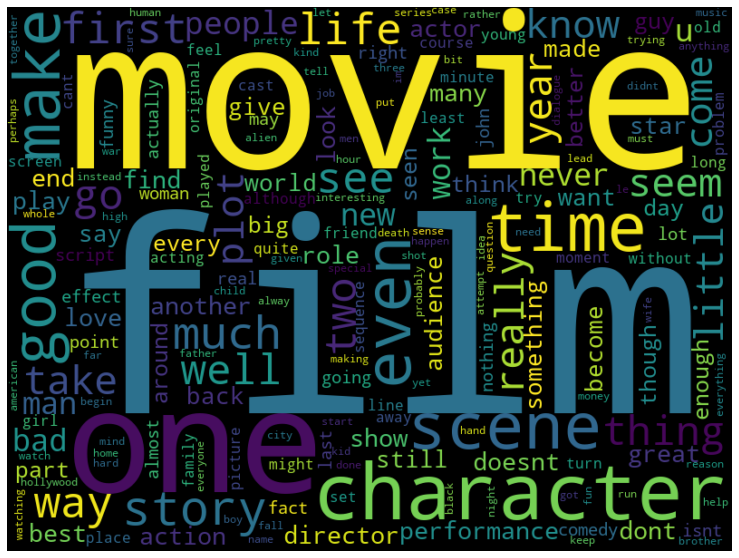

In [59]:
import matplotlib
import pylab as plt

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(width=800, height=600, collocations=False).generate(" ".join(data['review']))
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [60]:
data

,review,label,review_stem
0,film adapted comic book plenty success whether...,pos,"[film, adapt, comic, book, plenti, success, wh..."
1,every movie come along suspect studio every in...,pos,"[everi, movi, come, along, suspect, studio, ev..."
2,got mail work alot better deserves order make ...,pos,"[got, mail, work, alot, better, deserv, order,..."
3,jaw rare film grab attention show single image...,pos,"[jaw, rare, film, grab, attent, show, singl, i..."
4,moviemaking lot like general manager nfl team ...,pos,"[moviemak, lot, like, gener, manag, nfl, team,..."
...,...,...,...
1995,anything stigma taken warning releasing simila...,neg,"[anyth, stigmata, taken, warn, releas, similar..."
1996,john boorman zardoz goofy cinematic debacle fu...,neg,"[john, boorman, zardoz, goofi, cinemat, debacl..."
1997,kid hall acquired taste took least season watc...,neg,"[kid, hall, acquir, tast, took, least, season,..."
1998,time john carpenter great horror director cour...,neg,"[time, john, carpent, great, horror, director,..."


---
---
## <center> `Text categorisation` 

In [93]:
data_cleaned = pd.read_csv('movies_cleaned.csv', usecols=['label','review'])
data_cleaned['label']=data_cleaned['label'].apply(lambda x: 1 if x=='pos' else 0)

In [94]:
data_cleaned

,review,label
0,film adapted comic book plenty success whether...,1
1,every movie come along suspect studio every in...,1
2,got mail work alot better deserves order make ...,1
3,jaw rare film grab attention show single image...,1
4,moviemaking lot like general manager nfl team ...,1
...,...,...
1995,anything stigma taken warning releasing simila...,0
1996,john boorman zardoz goofy cinematic debacle fu...,0
1997,kid hall acquired taste took least season watc...,0
1998,time john carpenter great horror director cour...,0


In [95]:
#frequency distribution of the class attribute
print(pd.crosstab(index=data_cleaned["label"],columns="count"))

col_0  count
label       
0       1000
1       1000


In [96]:
x=data_cleaned['review']
y=data_cleaned['label']

In [97]:
# subdivision into train and test sets
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(data_cleaned,train_size=0.8,random_state=1,stratify=data_cleaned['label'])

In [98]:
Train.shape, Test.shape

((1600, 2), (400, 2))

### Generate the document term matrix - train set

In [99]:
Train = Train.fillna(' ')

In [100]:
#*** Generate the document term matrix - train set ***

#import the CountVectorizer tool
from sklearn.feature_extraction.text import CountVectorizer

#instantiation of the objet
parseur = CountVectorizer(min_df=0.1)

#create the document term matrix
XTrain = parseur.fit_transform(Train['review'])


In [101]:
#list of tokens
len(parseur.get_feature_names_out())

432

In [102]:
#mdt_bis
mdtTrain = XTrain.toarray()

In [103]:
frequency_matrix = pd.DataFrame(mdtTrain,columns=parseur.get_feature_names_out())
frequency_matrix

,able,across,act,acting,action,actor,actually,add,almost,along,...,worth,would,writer,written,wrong,year,yes,yet,young,youre
0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,3,0,0,0,0
2,0,0,0,1,1,1,2,0,0,1,...,0,3,0,1,0,0,0,0,0,0
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,2,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0,0,0,0,2,0,0,1,0,...,0,3,0,0,1,0,0,2,0,0
1596,0,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1597,1,0,0,0,0,2,0,0,2,0,...,0,1,0,0,0,1,1,0,0,0
1598,0,0,0,0,1,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Train classifiers

#### Knn 

In [104]:
#import the class KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#instatiate the object
knn_classifier = KNeighborsClassifier(n_neighbors=2)

#perform the training process
knn_classifier.fit(mdtTrain,Train['label'])

KNeighborsClassifier(n_neighbors=2)

In [106]:
#generate the document term matrix for the test set using the object learned from the train set

#create the document term matrix
mdtTest = parseur.transform(Test['review'])

#prediction for the test set
predTest = knn_classifier.predict(mdtTest)

In [107]:

#import the metrics class for the performance measurement
from sklearn import metrics

#confusion matrix
print('***Confusion matrix')
mcTest= metrics.confusion_matrix(Test['label'],predTest)
print(mcTest)



***Confusion matrix
[[165  35]
 [147  53]]


In [108]:
#accuracy rate
print('accuracy rate -->')
print(metrics.accuracy_score(Test['label'],predTest))

accuracy rate -->
0.545


In [109]:
#recall
print('Recall')
print(metrics.recall_score(Test['label'],predTest))

Recall
0.265


In [111]:
#precision
print('precision')
print(metrics.precision_score(Test['label'],predTest))

precision
0.6022727272727273


In [112]:
#F1-Score
print('F1-Score')
print(metrics.f1_score(Test['label'],predTest))


F1-Score
0.3680555555555555


In [113]:
#import the class LogistiRegression
from sklearn.linear_model import LogisticRegression

#instatiate the object
modelBis = LogisticRegression()

#perform the training process
modelBis.fit(mdtTrain,Train['label'])

#generate the document term matrix for the test set using the object learned from the train set
mdtTest = parseur.transform(Test['review'])

#prediction for the test set
predTest = modelBis.predict(mdtTest)

#confusion matrix
print('***Confusion matrix')
mcTest = metrics.confusion_matrix(Test['label'],predTest)
print(mcTest)

#accuracy rate
print('accuracy rate')
print(metrics.accuracy_score(Test['label'],predTest))

#recall
print('Recall')
print(metrics.recall_score(Test['label'],predTest))

#precision
print('precision')
print(metrics.precision_score(Test['label'],predTest))

#F1-Score
print('F1-Score')
print(metrics.f1_score(Test['label'],predTest))



***Confusion matrix
[[152  48]
 [ 58 142]]
accuracy rate
0.735
Recall
0.71
precision
0.7473684210526316
F1-Score
0.7282051282051281
